***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Spring 2025

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [15]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec


# Stochastic Block Model

In [16]:
def list2onehot(y, list_classes=None):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    if list_classes is None:
        list_classes = list(np.sort(c))
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

In [17]:
c = [2,3,1]
print(list2onehot(c))

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [18]:
def SBM(W, c):
    # Stochastic block model; 
    # W = (k x k) community weight matrix 
    # c = (n x 1), entries from [k]; community assignment vector
    k = W.shape[0]
    n = len(c)
    
    # C = (n x k) one-hot encoding of community assignment matrix
    C = list2onehot(c, list_classes=[i for i in range(k)])

    # P = (n x n) probability matrix = expected adjacency matrix 
    P = C @ W @ C.T
    
    # Now sample the edges according to P
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = list(G.nodes())
    
    for i in np.arange(n):
        for j in np.arange(i+1,n):
            U = np.random.rand()
            if U < P[i,j]:
                G.add_edge(nodes[i],nodes[j])
    return G

In [19]:
a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

In [20]:
W

array([[0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1],
       [0.1, 0.1, 0.8]])

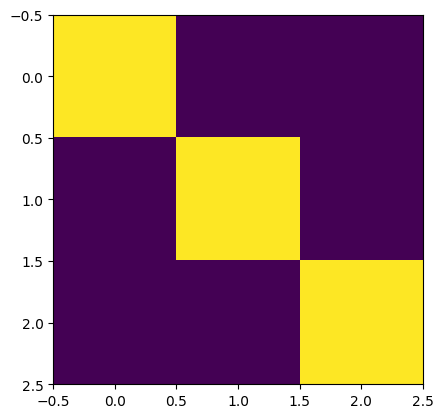

In [21]:
plt.imshow(W)

In [22]:
r = 10
c = [0]*r + [1]*r + [2]*r

In [23]:
G = SBM(W,c)

In [24]:
C = list2onehot(c, list_classes=[i for i in range(3)])

In [25]:
C

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

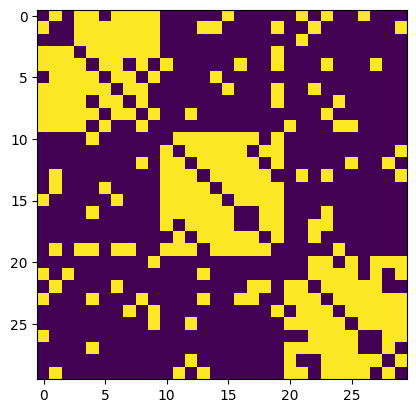

In [26]:
A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
plt.imshow(A1.todense())

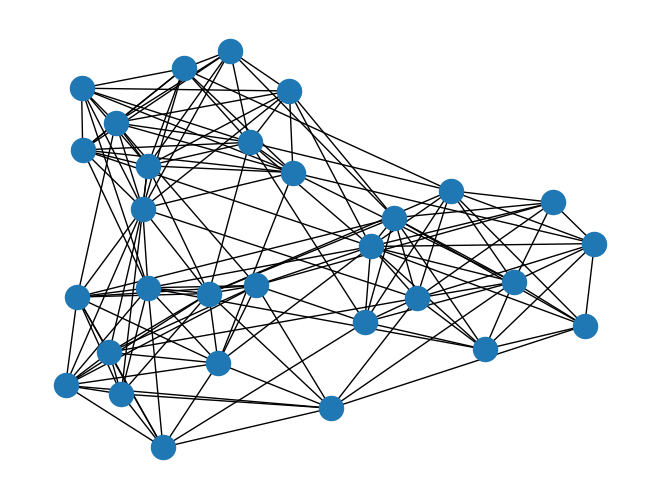

In [27]:
nx.draw(G)

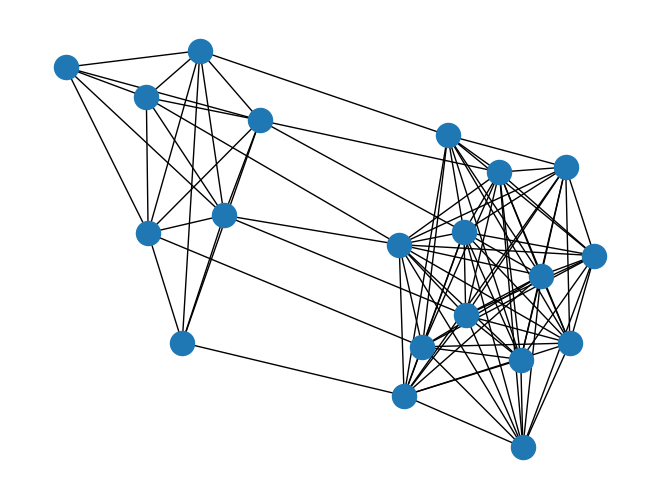

In [28]:
# Define a 2-community SBM
n = 20  # Total number of nodes
k = 2   # Number of communities
c = np.random.choice([0, 1], size=n)  # Random community assignments

# Define the block matrix (connection probabilities)
W = np.array([[0.8, 0.1],  # Probabilities within and across communities 
              [0.1, 0.8]])

# Generate the graph
G = SBM(W, c)

# Draw the graph with node colors based on community assignment
nx.draw(G)
plt.show()

In [29]:
list(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [30]:
def permute_nodes(G):
    node_mapping = dict(zip(G.nodes(), sorted(G.nodes(), key=lambda k: np.random.random())))
    G1 = nx.Graph()
    G1.add_nodes_from(list(G.nodes()))
    #nodes = list(G.nodes())
    
    for e in G.edges():
        u = node_mapping.get(e[0])
        v = node_mapping.get(e[1])
        G1.add_edge(u,v)
    return G1

In [31]:
G1 = permute_nodes(G)

sum A= 192


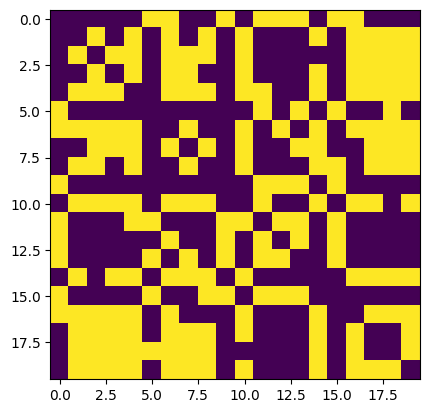

In [32]:
A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
print("sum A=", np.sum(A))
plt.imshow(A.todense())

sum A= 192


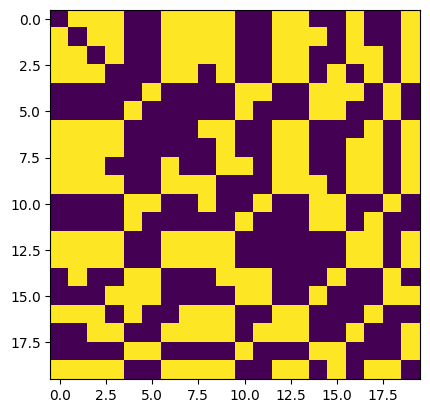

In [33]:
A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
print("sum A=", np.sum(A1))
plt.imshow(A1.todense())

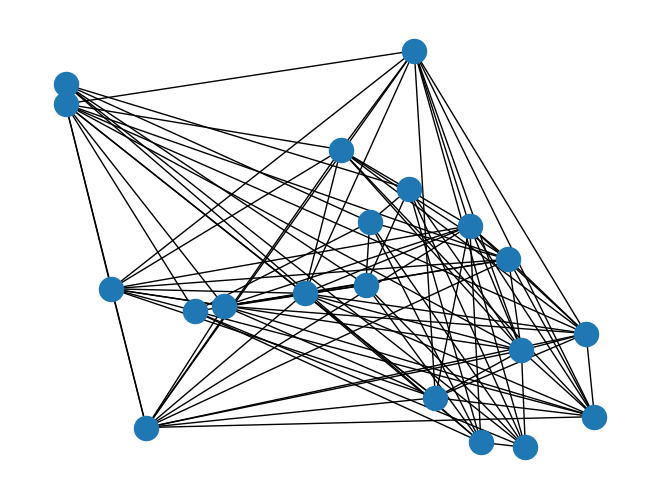

In [34]:
nx.draw(G1,pos=nx.random_layout(G1))

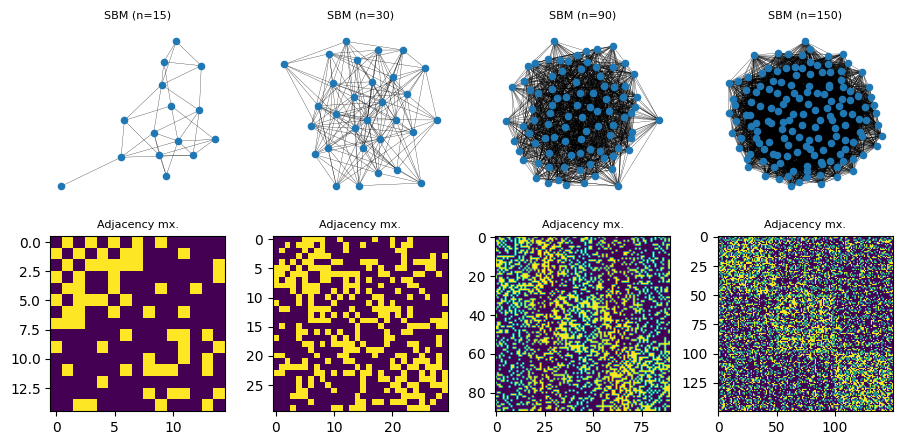

In [35]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.5
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    
    G = SBM(W, c)    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)

    
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex1", bbox_inches="tight")

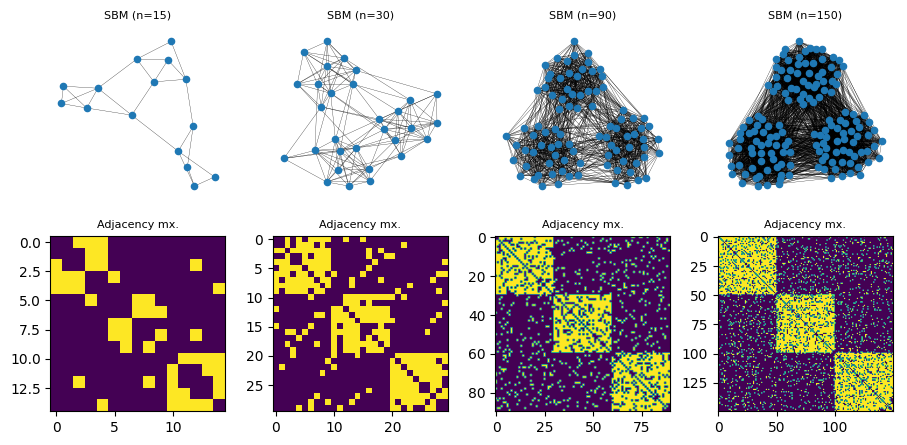

In [36]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    
    G = SBM(W, c)    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)

    
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex2", bbox_inches="tight")

In [37]:
a = 0.5
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

In [38]:
W

array([[0.5, 0.3, 0.3],
       [0.3, 0.5, 0.3],
       [0.3, 0.3, 0.5]])

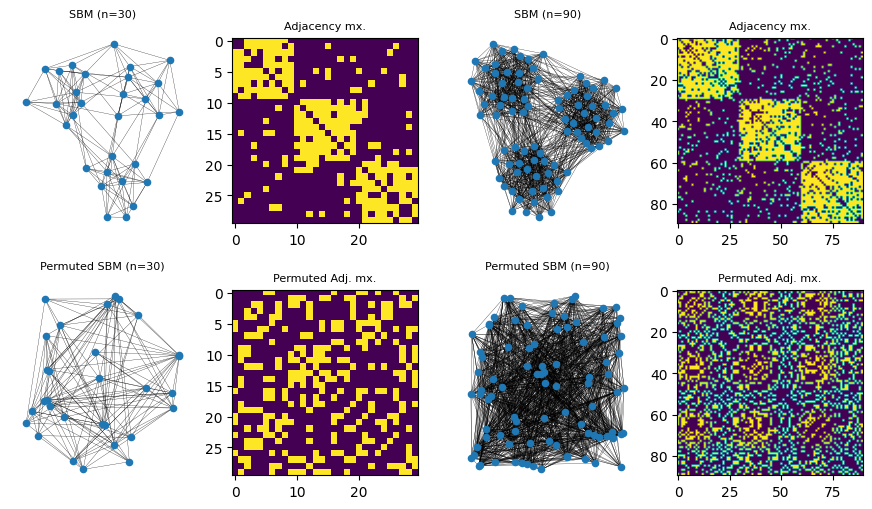

In [39]:
fig = plt.figure(figsize=[11,6], constrained_layout=False)
network_list = [""]
r_list=[10, 30]

a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list)*2, wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    G = SBM(W, c) 
    
    # create a random mapping old label -> new label
    G1 = permute_nodes(G)
    
    
    inner_grid = outer_grid[0,2*i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)
    
    inner_grid = outer_grid[0,2*i+1].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)

    ### Do the same for the node-permuted graph

    inner_grid1 = outer_grid[1,2*i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    edges = G1.edges()
    weights = [0.2 for u,v in G1.edges]
    nx.draw(G1, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.random_layout(G1))
    #ax.legend()
    ax.set_title(r"Permuted SBM (n={})".format(3*r), fontsize=8)
    
    inner_grid = outer_grid[1,2*i+1].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Permuted Adj. mx.", fontsize=8)



plt.savefig("SBM_ex4", bbox_inches="tight")

# Spectral clustering

In [40]:
from numpy import linalg as LA

In [41]:
a = 0.8
b = 0.1
W = b * np.ones([2,2]) + (a-b) * np.eye(2)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

In [42]:
W

array([[0.8, 0.1],
       [0.1, 0.8]])

In [43]:
w,v = LA.eigh(W)

In [44]:
w #larger eigenvalue is sum of .8+.1

array([0.7, 0.9])

In [45]:
v #normalized second column to have 1 1 then second(first column) is -1 1

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [46]:
v[:,-2]

array([-0.70710678,  0.70710678])

In [47]:
r = 10
c = [0]*r + [1]*r 

In [48]:
G = SBM(W,c)

In [61]:
A = nx.adjacency_matrix(G).toarray()
w, v = LA.eigh(A)
print("np.sum(A)=", np.sum(A))

In [ ]:
w, v = LA.eigh(A)
print("np.sum(A)=", np.sum(A))

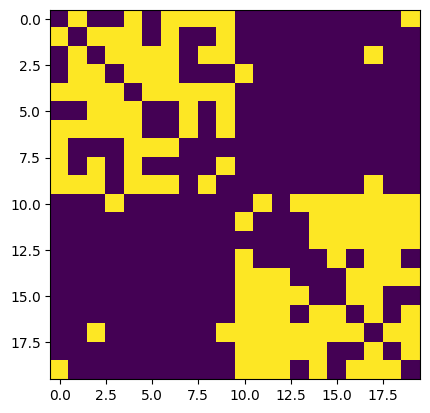

In [50]:
plt.imshow(A)

In [51]:
w

array([-3.02340336, -2.77666344, -2.39933451, -2.07344555, -1.79499742,
       -1.70636886, -1.57569315, -1.26348257, -0.93718071, -0.77568082,
       -0.59901141, -0.17774478,  0.34120023,  0.68932213,  0.78398077,
        0.96813206,  1.20590203,  1.71395002,  6.11390907,  7.28661027])

In [52]:
lambda2 = w[-2]

In [53]:
v.shape

(20, 20)

In [54]:
v2 = v[:,-2]

In [55]:
v2

array([ 0.25924374,  0.29647267,  0.30543331,  0.22811961,  0.38588222,
        0.23322584,  0.32411963,  0.196678  ,  0.2061476 ,  0.30980842,
       -0.15043115, -0.16952204, -0.1449173 , -0.09230872, -0.17055773,
       -0.13754953, -0.1674016 , -0.11638449, -0.16000195, -0.13411592])

In [56]:
c_hat = np.sign(v2)

In [57]:
c_hat

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

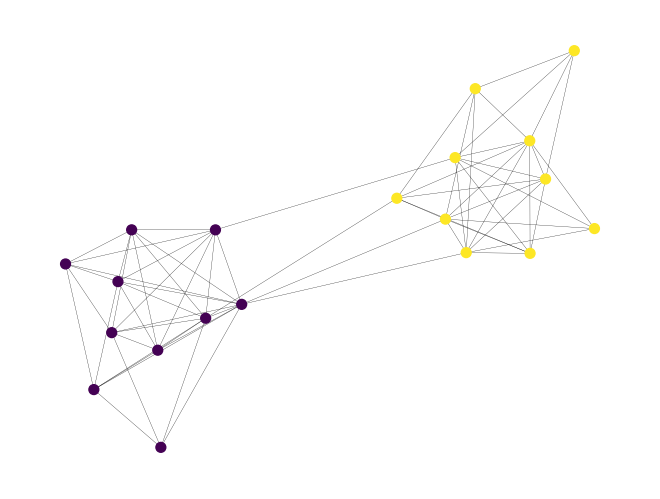

In [58]:
nx.draw(G, node_color=c_hat, with_labels=False, width=0.2, node_size=50) #can miss 1

In [ ]:
#A = nx.adjacency_matrix(G).toarray()
#replace A = nx.adjacency_matrix(G).toarray()
C = list2onehot(c, list_classes=[i for i in range(k)])
P = C @ W @ C.T

w, v = LA.eigh(A)
print("np.sum(A)=", np.sum(A))

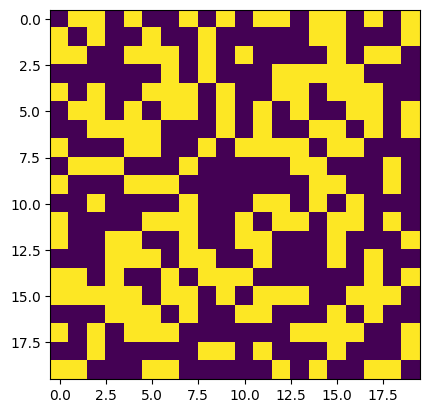

In [728]:
plt.imshow(A1)

np.sum(A1)= 168


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/1077467255.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1).toarray()


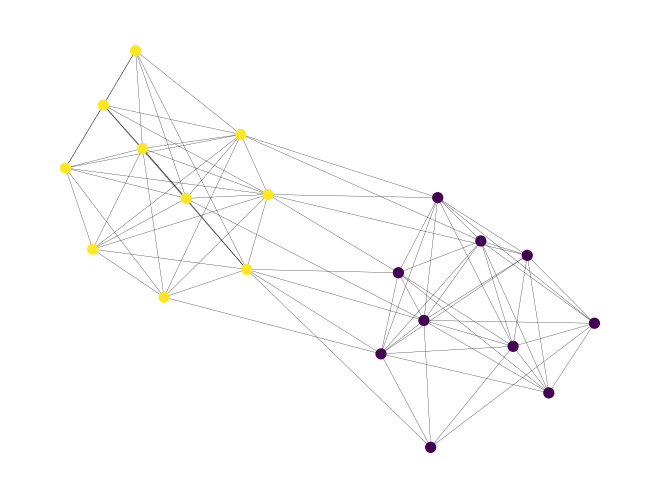

In [722]:
# Now do the same spectral clustering for node-permuted graph

G1 = permute_nodes(G)

A1 = nx.adjacency_matrix(G1).toarray()
print("np.sum(A1)=", np.sum(A1))
w, v = LA.eigh(A1)

v2 = v[:,-2]
c_hat = np.sign(v2)

nx.draw(G1, node_color=c_hat, with_labels=False, width=0.2, node_size=50)

np.sum(A1)= 178


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3676649117.py:11: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1).toarray()


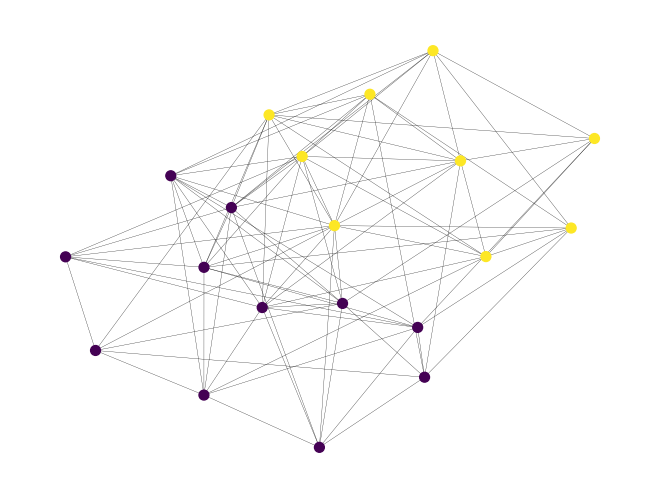

In [726]:
a = 0.6
b = 0.3
W = b * np.ones([2,2]) + (a-b) * np.eye(2)

r = 10
c = [0]*r + [1]*r 

G = SBM(W,c)
G1 = permute_nodes(G)

A1 = nx.adjacency_matrix(G1).toarray()
print("np.sum(A1)=", np.sum(A1))
w, v = LA.eigh(A1)

v2 = v[:,-2]
c_hat = np.sign(v2)

nx.draw(G1, node_color=c_hat, with_labels=False, width=0.2, node_size=50)

# Spectral clustering on a RW subgraph of Caltech

In [758]:
def RW(G, x0=None, steps=1, return_history=False):
    # simple symmetric random walk on graph G 
    # initialization at x0
    if x0 is None:
        x = np.random.choice(G.nodes())
    else:
        x = x0
    
    history = []
    for i in np.arange(steps):
        if len(list(G.neighbors(x))) == 1:
            print("RW is stuck at isolated node")
            x = np.random.choice(G.nodes()) # re-initialize uniformly at random
        else: 
            x = np.random.choice(list(G.neighbors(x)))

        if return_history:
            history.append(x)
        
    if not return_history: 
        return x 
    else: 
        return history

Number of nodes: 769
Number of edges: 16656
Avg. clustering coefficient: 0.4091173048334611
Avg. shortest path length: 2.3378480449470755
edge density: 0.05640442132639792
Number of nodes: 88
Number of edges: 605


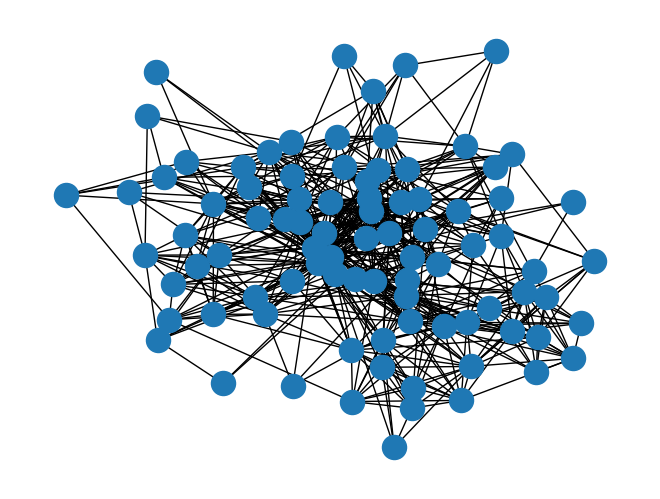

In [759]:
## Load Caltech Facebook graph

# Initialize graph 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 
    
# Print out the number of nodes and edges in G

print("Number of nodes:", len(list(G.nodes())))
print("Number of edges:", len(list(G.edges())))
print("Avg. clustering coefficient:", nx.average_clustering(G0))
print("Avg. shortest path length:", nx.average_shortest_path_length(G0))
print("edge density:", nx.density(G))
G0 = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

# Perform a random walk and take an induced subgraph on a random walk trajectory 
RW_trajectory = RW(G0, steps=100, return_history=True)
H = G.subgraph(nodes=RW_trajectory)
print("Number of nodes:", len(list(H.nodes())))
print("Number of edges:", len(list(H.edges())))
nx.draw(H)

In [760]:
def sectral_clustering(G, k=2):
    ### Spectral clustering of a graph G into k disjoint clusters
    ### Currently it only runs for k=2
    ### Larger k needs spectal embedding + k-means clustering  
    A1 = nx.adjacency_matrix(G).toarray()
    w, v = LA.eigh(A1)
    v2 = v[:,-2]
    c_hat = np.sign(v2)
    nx.draw(G, node_color=c_hat, with_labels=False, width=0.2, node_size=50)
    return c_hat

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/2750658275.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G).toarray()


array([ 1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.])

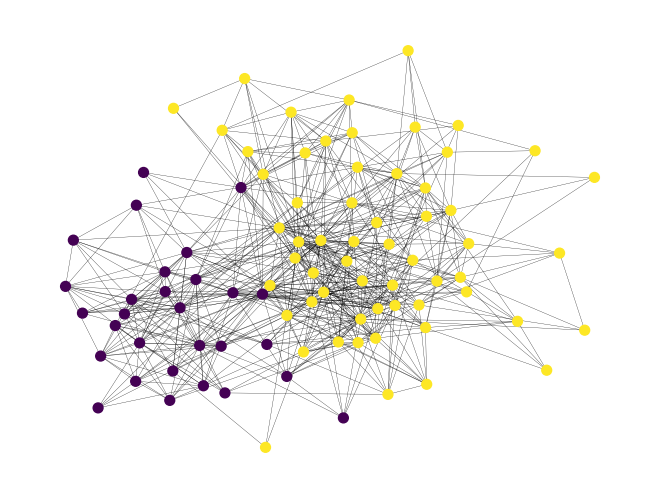

In [761]:
sectral_clustering(H, k=2)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/2750658275.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G).toarray()


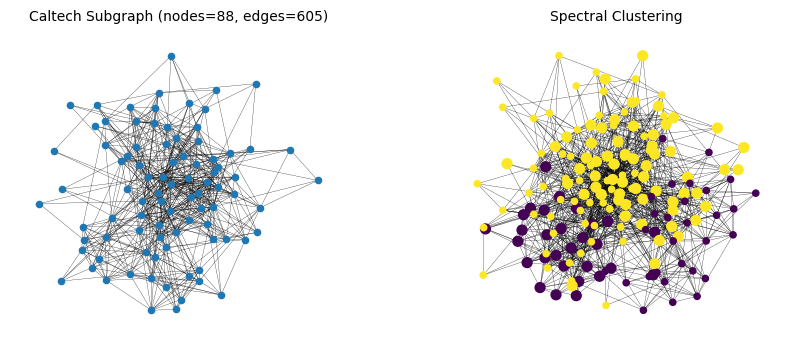

In [776]:
fig = plt.figure(figsize=[10,4], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.3, hspace=0.1)

inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
nx.draw(H, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("Caltech Subgraph (nodes={}, edges={})".format(len(list(H.nodes())), len(list(H.edges())) ) , fontsize=10)

inner_grid = outer_grid[0,1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
c_hat = sectral_clustering(H, k=2)
nx.draw(H, node_color=c_hat, width=weights, node_size=20, ax=ax)
ax.set_title("Spectral Clustering", fontsize=10)

plt.savefig("Caltech_SC", bbox_inches="tight")